## __Leah Gerke__
### _Analysis Report_
### _11/20/2024_

For my Analyis Report, I have chosen to complete Option 1 where I build off of my API Data Report assignment. 

Due to me not remembering line for line what I did for this assigment, I have kept most of the existing markdown cells and toubleshooting for my own benefit and explanations.

The first step of Option 1 was to take the feedback given on the assignment and make corrections and improvements. The biggest part I missed points on was the creativity of my work. 

So to I want to improve that by adding in a fourth factor to analyze in my hypothesis: Valence. I chose this in hopes that by adding the element of "mood" it increases the creativity of my report while also not changing everything about it since Option 1 is about utilizing my exiscting API Data Report.

Additionally, in the API Data Report, I mentioned in my conclusion that "I did not realize loudness levels were in the negatives, so I might need to redefine 'loudness' in my hypothesis and figure out it's correlation with energy and danceability (e.g. what means loud and what means quieter, and do I intend to mean if it's louder, it's more danceable...)". So I have went ahead and adjusted this hypothesis so it makes more sense.

Since loudness is measured in decibels (dB). Spotify for Developers defines that "loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db".

__State a hypothesis that could be tested using the data available from the Spotify API.__
- The danceablility of a song correlates directly with the energy, loudness, and ultimately the mood of it.
- (Since "tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry"-Spotify for Developers).

__Explain the theoretical and the statistical applications of your hypothesis.__
- Theoretical: The louder a song is and the more energy it has, the more danceable a song is, and the more danceable, the more positiveness it has.
- Statistical: A song scores from level 0 (lowest) to level 1 (highest). When a song scores .5 or higher on each energy level _and_ scores -10db or more on loudness levels, the danceability score will indicate a song is suitable to dance to by scoring .5 or higher. If the song is deemed "danceable" by this standard, the valence will also be higher by scoring a .5 or higher. 


__Identify and describe the Spotify API endpoints you will use to collect data. Explain why these endpoints (and which of the response objects) are suitable to test your hypothesis.__
- I will need the "Get Track's Audio Features" endpoint that is under the "Tracks" reference to get the danceability, valence, loudness, and energy data.
- My hypothesis relies solely on what data presents itself with these four endpoints.
- I will be using Billie Eilish's latest album, "Hit Me Hard and Soft". I think there are a variety of different types of songs and beats and overall vibes in this specific album. And hopefully this will showcase a good set of data for me to determine if my hypothesis is correct.

__Discuss the ways in which this data might be reliable and unreliable.__
- The danceability level is determined by "a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity" and the data would be reliable in calculating all of that data as it would be factual. On the other hand, this data could be deemed unreliable in how it is incapable of taking human opinion into account. There is a possibility that even if a song is deemed danceable (or musically postive) based on the calculated elemtents, a person may disagree in that the song cannot be danced to (or is not very happy).

__Are there any limitations or caveats to the response objects that might alter your ability to test your hypothesis?__
- Yes, the data I find may be limited or nonexistent based on which song, genre, or artist I use to test and find data for.

In [1]:
import urllib
import requests
import pandas as pd
import json
import base64

In [2]:
text = 'billie :%&= eilish'
urllib.parse.quote_plus(text)

'billie+%3A%25%26%3D+eilish'

In [3]:
query = 'artist:Eilish genre:pop tag:new'
url_query = urllib.parse.quote_plus(query)

In [4]:
def get_sesh_token(SeshID, SeshKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SeshID + ":" + SeshKey).\
                                   encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, 
                            data = data, 
                            headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [5]:
spot_keys = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\Spotify_Keys_9-12-23.txt")

In [6]:
spot_keys

,Client_ID,Client_Secret
0,dc5c42b67fc246c6a3b12d5744f72fa6,98da17e3bb654706909793a442643edf


In [7]:
access_token = get_sesh_token(spot_keys['Client_ID'].iloc[0], 
spot_keys['Client_Secret'].iloc[0])

200


In [8]:
access_token

'BQC4hGDViH5MVuWmmFZqLI_zjJNsw0O_IXktDsXHTuBYhq1X7ajY5_30aS3M3g14lsQNeBpxCvvHDfD9mjMfdjElQv1W5sP-ajg7GLdxI7JMpb-eog4'

In [9]:
aud_feats_ep = 'https://api.spotify.com/v1/audio-features'
trcks_ep = 'https://api.spotify.com/v1/tracks'
ab_trcks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'
#11dFghVXANMlKmJXsNCbNl
#t_features_ep = ''
#tracks_ep = 'https://api.spotify.com/v1/tracks'
#ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'
#https://api.spotify.com/v1/audio-features?ids={}
#https://api.spotify.com/v1/audio-features

___I originally had "aud_feats_ep" have this URL: https://api.spotify.com/v1/audio-features/{}. Everything worked with it until I tried to actually isolate "audio features". After much trial and error of adjusting the names and definitions of things, I just could not figure out why it was giving me a 400 output. So I asked chatgpt what was wrong and it suggested I double check the "aud_feats_ep" url and add on "?ids={}" to the end of it. Sure enough, after I did that, the output changed to 200. However, when I actually went to look at the DataFrame using ".head()", nothing I could use showed up. I knew we did this exact data frame in class so went back to the notes from 10-1-24 and saw the URL we used for audio features didnt have ANYTHING on the end of it: https://api.spotify.com/v1/audio-features. So THAT is what "fixed" my dataframe. That's why there are commented out bits of code underneath my url definition cell.___

In [10]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [11]:
sesh_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [12]:
be_alb_id = "7aJuG4TFXa2hmE4z1yxc3n"

In [13]:
be_trck_feats = api_call(aud_feats_ep + '?ids={}'.format(be_alb_id),
                             sesh_header)

200


In [14]:
be_feats_df = pd.DataFrame(be_trck_feats['audio_features'])
be_feats_df.head()

,0
0,None


___I attempted to gather data on _only_ the audio features first without having to create the album dataframe. But I believe I needed to obtain the album contents before I could define the individual audio features. Because my hypothesis is looking at the different songs in the same album, without defining the album, there was no audio features I could look at because I think the code didn't know what songs I was trying to get the audio features to in the first place (at least, doing it the way I did it).___

In [15]:
aud_feats_ep.format(be_alb_id)

'https://api.spotify.com/v1/audio-features'

In [16]:
be_alb_response = api_call(ab_trcks_ep.format(be_alb_id), sesh_header)

200


In [17]:
be_alb_df = pd.DataFrame(be_alb_response['items'])
be_alb_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,name,preview_url,track_number,type,uri,is_local
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,219733,False,{'spotify': 'https://open.spotify.com/track/1C...,https://api.spotify.com/v1/tracks/1CsMKhwEmNnm...,1CsMKhwEmNnmvHUuO5nryA,SKINNY,None,1,track,spotify:track:1CsMKhwEmNnmvHUuO5nryA,False
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,179586,False,{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/629DixmZGHc7...,629DixmZGHc7ILtEntuiWE,LUNCH,None,2,track,spotify:track:629DixmZGHc7ILtEntuiWE,False
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,303440,False,{'spotify': 'https://open.spotify.com/track/7B...,https://api.spotify.com/v1/tracks/7BRD7x5pt8Lq...,7BRD7x5pt8Lqa1eGYC4dzj,CHIHIRO,None,3,track,spotify:track:7BRD7x5pt8Lqa1eGYC4dzj,False
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,210373,False,{'spotify': 'https://open.spotify.com/track/6d...,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,None,4,track,spotify:track:6dOtVTDdiauQNBQEDOtlAB,False
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,261466,False,{'spotify': 'https://open.spotify.com/track/3Q...,https://api.spotify.com/v1/tracks/3QaPy1KgI7nu...,3QaPy1KgI7nu9FJEQUgn6h,WILDFLOWER,None,5,track,spotify:track:3QaPy1KgI7nu9FJEQUgn6h,False


In [18]:
be_trck_ids = ','.join(be_alb_df['id'].to_list())

In [19]:
aud_feats_ep + '?ids={}'.format(be_trck_ids)

'https://api.spotify.com/v1/audio-features?ids=1CsMKhwEmNnmvHUuO5nryA,629DixmZGHc7ILtEntuiWE,7BRD7x5pt8Lqa1eGYC4dzj,6dOtVTDdiauQNBQEDOtlAB,3QaPy1KgI7nu9FJEQUgn6h,6TGd66r0nlPaYm3KIoI7ET,6fPan2saHdFaIHuTSatORv,1LLUoftvmTjVNBHZoQyveF,7DpUoxGSdlDHfqCYj0otzU,2prqm9sPLj10B4Wg0wE5x9'

In [20]:
be_trck_feats = api_call(aud_feats_ep + '?ids={}'.format(be_trck_ids),
                            sesh_header)

200


In [21]:
be_trck_info = api_call(trcks_ep + '?market=US&ids={}'.format(be_trck_ids),
                            sesh_header)

200


In [22]:
be_feats_df = pd.DataFrame(be_trck_feats['audio_features'])
be_feats_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.251,0.252,9,-14.478,1,0.0375,0.6930,0.007060,0.0968,0.0395,69.988,audio_features,1CsMKhwEmNnmvHUuO5nryA,spotify:track:1CsMKhwEmNnmvHUuO5nryA,https://api.spotify.com/v1/tracks/1CsMKhwEmNnm...,https://api.spotify.com/v1/audio-analysis/1CsM...,219733,4
1,0.893,0.400,11,-7.981,0,0.0643,0.0452,0.082300,0.0632,0.9450,124.987,audio_features,629DixmZGHc7ILtEntuiWE,spotify:track:629DixmZGHc7ILtEntuiWE,https://api.spotify.com/v1/tracks/629DixmZGHc7...,https://api.spotify.com/v1/audio-analysis/629D...,179587,4
2,0.700,0.425,7,-12.531,1,0.0529,0.1440,0.879000,0.0830,0.5210,110.015,audio_features,7BRD7x5pt8Lqa1eGYC4dzj,spotify:track:7BRD7x5pt8Lqa1eGYC4dzj,https://api.spotify.com/v1/tracks/7BRD7x5pt8Lq...,https://api.spotify.com/v1/audio-analysis/7BRD...,303440,4
3,0.747,0.507,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.4380,104.978,audio_features,6dOtVTDdiauQNBQEDOtlAB,spotify:track:6dOtVTDdiauQNBQEDOtlAB,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,https://api.spotify.com/v1/audio-analysis/6dOt...,210373,4
4,0.467,0.247,6,-12.002,0,0.0431,0.6120,0.000271,0.1700,0.1260,148.101,audio_features,3QaPy1KgI7nu9FJEQUgn6h,spotify:track:3QaPy1KgI7nu9FJEQUgn6h,https://api.spotify.com/v1/tracks/3QaPy1KgI7nu...,https://api.spotify.com/v1/audio-analysis/3QaP...,261467,4


___My audio features dataframe showing the dancerability, energy, loudness, and valence. I really want to crunch it down to just those four features later on.___

In [23]:
be_trcks_df = pd.DataFrame(be_trck_info['tracks'])
be_trcks_df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,219733,False,{'isrc': 'USUM72401995'},{'spotify': 'https://open.spotify.com/track/1C...,https://api.spotify.com/v1/tracks/1CsMKhwEmNnm...,1CsMKhwEmNnmvHUuO5nryA,False,True,SKINNY,79,None,1,track,spotify:track:1CsMKhwEmNnmvHUuO5nryA
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,179586,False,{'isrc': 'USUM72401991'},{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/629DixmZGHc7...,629DixmZGHc7ILtEntuiWE,False,True,LUNCH,86,None,2,track,spotify:track:629DixmZGHc7ILtEntuiWE
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,303440,False,{'isrc': 'USUM72401988'},{'spotify': 'https://open.spotify.com/track/7B...,https://api.spotify.com/v1/tracks/7BRD7x5pt8Lq...,7BRD7x5pt8Lqa1eGYC4dzj,False,True,CHIHIRO,88,None,3,track,spotify:track:7BRD7x5pt8Lqa1eGYC4dzj
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,210373,False,{'isrc': 'USUM72401994'},{'spotify': 'https://open.spotify.com/track/6d...,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,6dOtVTDdiauQNBQEDOtlAB,False,True,BIRDS OF A FEATHER,97,None,4,track,spotify:track:6dOtVTDdiauQNBQEDOtlAB
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,261466,False,{'isrc': 'USUM72401993'},{'spotify': 'https://open.spotify.com/track/3Q...,https://api.spotify.com/v1/tracks/3QaPy1KgI7nu...,3QaPy1KgI7nu9FJEQUgn6h,False,True,WILDFLOWER,93,None,5,track,spotify:track:3QaPy1KgI7nu9FJEQUgn6h


___This is the dataframe that actually shows the name of the songs in the album, which is one of the main features I need for my hypothesis, so I can identify which songs are which___.

In [24]:
be_merged = pd.merge(be_trcks_df, be_feats_df,how = 'inner', on = 'id')
be_merged.head()

,album,artists,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,is_local,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,219733,False,{'isrc': 'USUM72401995'},{'spotify': 'https://open.spotify.com/track/1C...,https://api.spotify.com/v1/tracks/1CsMKhwEmNnm...,1CsMKhwEmNnmvHUuO5nryA,False,...,0.007060,0.0968,0.0395,69.988,audio_features,spotify:track:1CsMKhwEmNnmvHUuO5nryA,https://api.spotify.com/v1/tracks/1CsMKhwEmNnm...,https://api.spotify.com/v1/audio-analysis/1CsM...,219733,4
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,179586,False,{'isrc': 'USUM72401991'},{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/629DixmZGHc7...,629DixmZGHc7ILtEntuiWE,False,...,0.082300,0.0632,0.9450,124.987,audio_features,spotify:track:629DixmZGHc7ILtEntuiWE,https://api.spotify.com/v1/tracks/629DixmZGHc7...,https://api.spotify.com/v1/audio-analysis/629D...,179587,4
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,303440,False,{'isrc': 'USUM72401988'},{'spotify': 'https://open.spotify.com/track/7B...,https://api.spotify.com/v1/tracks/7BRD7x5pt8Lq...,7BRD7x5pt8Lqa1eGYC4dzj,False,...,0.879000,0.0830,0.5210,110.015,audio_features,spotify:track:7BRD7x5pt8Lqa1eGYC4dzj,https://api.spotify.com/v1/tracks/7BRD7x5pt8Lq...,https://api.spotify.com/v1/audio-analysis/7BRD...,303440,4
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,210373,False,{'isrc': 'USUM72401994'},{'spotify': 'https://open.spotify.com/track/6d...,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,6dOtVTDdiauQNBQEDOtlAB,False,...,0.060800,0.1170,0.4380,104.978,audio_features,spotify:track:6dOtVTDdiauQNBQEDOtlAB,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,https://api.spotify.com/v1/audio-analysis/6dOt...,210373,4
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,261466,False,{'isrc': 'USUM72401993'},{'spotify': 'https://open.spotify.com/track/3Q...,https://api.spotify.com/v1/tracks/3QaPy1KgI7nu...,3QaPy1KgI7nu9FJEQUgn6h,False,...,0.000271,0.1700,0.1260,148.101,audio_features,spotify:track:3QaPy1KgI7nu9FJEQUgn6h,https://api.spotify.com/v1/tracks/3QaPy1KgI7nu...,https://api.spotify.com/v1/audio-analysis/3QaP...,261467,4


___I then attempted to merge the data sets of the tracks and audio features together but I had them in the wrong order in my list and they weren't displaying how I wanted them to so I ended up changing it to the order in the cell below this and was able to see the danceability, energy, loudness, and valence levels while still being able to see all 10 songs on the album so I can easily identify them with their respective audio features.___

In [25]:
be_merged = pd.merge(be_feats_df, be_trcks_df,how = 'inner', on = 'id')
be_merged.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.251,0.252,9,-14.478,1,0.0375,0.6930,0.007060,0.0968,0.0395,...,{'spotify': 'https://open.spotify.com/track/1C...,https://api.spotify.com/v1/tracks/1CsMKhwEmNnm...,False,True,SKINNY,79,None,1,track,spotify:track:1CsMKhwEmNnmvHUuO5nryA
1,0.893,0.400,11,-7.981,0,0.0643,0.0452,0.082300,0.0632,0.9450,...,{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/629DixmZGHc7...,False,True,LUNCH,86,None,2,track,spotify:track:629DixmZGHc7ILtEntuiWE
2,0.700,0.425,7,-12.531,1,0.0529,0.1440,0.879000,0.0830,0.5210,...,{'spotify': 'https://open.spotify.com/track/7B...,https://api.spotify.com/v1/tracks/7BRD7x5pt8Lq...,False,True,CHIHIRO,88,None,3,track,spotify:track:7BRD7x5pt8Lqa1eGYC4dzj
3,0.747,0.507,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.4380,...,{'spotify': 'https://open.spotify.com/track/6d...,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,False,True,BIRDS OF A FEATHER,97,None,4,track,spotify:track:6dOtVTDdiauQNBQEDOtlAB
4,0.467,0.247,6,-12.002,0,0.0431,0.6120,0.000271,0.1700,0.1260,...,{'spotify': 'https://open.spotify.com/track/3Q...,https://api.spotify.com/v1/tracks/3QaPy1KgI7nu...,False,True,WILDFLOWER,93,None,5,track,spotify:track:3QaPy1KgI7nu9FJEQUgn6h
5,0.407,0.192,7,-10.990,1,0.0368,0.6370,0.000003,0.2100,0.1590,...,{'spotify': 'https://open.spotify.com/track/6T...,https://api.spotify.com/v1/tracks/6TGd66r0nlPa...,False,True,THE GREATEST,82,None,6,track,spotify:track:6TGd66r0nlPaYm3KIoI7ET
6,0.467,0.392,9,-9.355,1,0.0908,0.2000,0.017400,0.1060,0.3130,...,{'spotify': 'https://open.spotify.com/track/6f...,https://api.spotify.com/v1/tracks/6fPan2saHdFa...,False,True,L’AMOUR DE MA VIE,82,None,7,track,spotify:track:6fPan2saHdFaIHuTSatORv
7,0.857,0.386,1,-9.761,1,0.1680,0.2430,0.093100,0.1110,0.6610,...,{'spotify': 'https://open.spotify.com/track/1L...,https://api.spotify.com/v1/tracks/1LLUoftvmTjV...,False,True,THE DINER,79,None,8,track,spotify:track:1LLUoftvmTjVNBHZoQyveF
8,0.521,0.254,9,-14.409,0,0.0399,0.8150,0.884000,0.1140,0.1530,...,{'spotify': 'https://open.spotify.com/track/7D...,https://api.spotify.com/v1/tracks/7DpUoxGSdlDH...,False,True,BITTERSUITE,77,None,9,track,spotify:track:7DpUoxGSdlDHfqCYj0otzU
9,0.349,0.337,7,-10.671,1,0.0407,0.2900,0.172000,0.1390,0.0365,...,{'spotify': 'https://open.spotify.com/track/2p...,https://api.spotify.com/v1/tracks/2prqm9sPLj10...,False,True,BLUE,83,None,10,track,spotify:track:2prqm9sPLj10B4Wg0wE5x9


___This is where I ended my API Data Report. I did not really conclude anything because I hadn't yet "analyzed" it. I did mention wanting to narrow down the data to just present the name, danceability, loudness, energy, and valence levels of the song. So I will be attempting to do that as well as just overall tidying like organizing it as a ascending/descending dataset. And then showcasing it as a comprehensive visual graph.___

In [26]:
be_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y'],
      dtype='object')

In [27]:
be_narrowed_down = be_merged.loc[:, ['name', 'energy', 'loudness', 'danceability', 'valence']]
be_narrowed_down.head()

,name,energy,loudness,danceability,valence
0,SKINNY,0.252,-14.478,0.251,0.0395
1,LUNCH,0.400,-7.981,0.893,0.9450
2,CHIHIRO,0.425,-12.531,0.700,0.5210
3,BIRDS OF A FEATHER,0.507,-10.171,0.747,0.4380
4,WILDFLOWER,0.247,-12.002,0.467,0.1260


___^I narrowed down the information using loc so the dataset would only showcase the relevant columns for my hypothesis.___

In [28]:
be_narrowed_down.value_counts().sort_values(ascending = True)

name                energy  loudness  danceability  valence
BIRDS OF A FEATHER  0.507   -10.171   0.747         0.4380     1
BITTERSUITE         0.254   -14.409   0.521         0.1530     1
BLUE                0.337   -10.671   0.349         0.0365     1
CHIHIRO             0.425   -12.531   0.700         0.5210     1
LUNCH               0.400   -7.981    0.893         0.9450     1
L’AMOUR DE MA VIE   0.392   -9.355    0.467         0.3130     1
SKINNY              0.252   -14.478   0.251         0.0395     1
THE DINER           0.386   -9.761    0.857         0.6610     1
THE GREATEST        0.192   -10.990   0.407         0.1590     1
WILDFLOWER          0.247   -12.002   0.467         0.1260     1
Name: count, dtype: int64

___^I then attempted to organize the dataframe by the danceability level of a song(since the danceability is the element that my entire hypothesis is revolved around) and I originally used this structure. But every time I would insert <.sort_values('danceability', ascending = True)>, it would give me an error.___

In [29]:
be_narrowed_down.groupby('danceability').count().\
sort_values('danceability', ascending = True)

,name,energy,loudness,valence
danceability,,,,
0.251,1,1,1,1
0.349,1,1,1,1
0.407,1,1,1,1
0.467,2,2,2,2
0.521,1,1,1,1
0.700,1,1,1,1
0.747,1,1,1,1
0.857,1,1,1,1
0.893,1,1,1,1


___^So I then tried a different approach. This was sorting them by danceability, but I could not figure out why it didn't display the other levels or the name of the song. I messed around with replacing 'danceability' with various other column options but they always turned out similar to this. I even tried adding the string 'danceability', 'energy', 'loudness' into groupby in the hopes I just needed to add them in some how, but every time it would give me an error.___

In [30]:
be_sort = be_narrowed_down.sort_values(by='danceability', ascending=True)
be_sort = be_sort.set_index('name')
be_sort.head(10)

,energy,loudness,danceability,valence
name,,,,
SKINNY,0.252,-14.478,0.251,0.0395
BLUE,0.337,-10.671,0.349,0.0365
THE GREATEST,0.192,-10.990,0.407,0.1590
WILDFLOWER,0.247,-12.002,0.467,0.1260
L’AMOUR DE MA VIE,0.392,-9.355,0.467,0.3130
BITTERSUITE,0.254,-14.409,0.521,0.1530
CHIHIRO,0.425,-12.531,0.700,0.5210
BIRDS OF A FEATHER,0.507,-10.171,0.747,0.4380
THE DINER,0.386,-9.761,0.857,0.6610


___^So my last resort was to ask chatGPT why neither of these appraoches were working and it told me the value_counts() "doesn't align with sorting by a specific column". And then suggested I use this structure instead which, of course, got me exactly what I wanted.___

___Additionally, I structured it where energy and loudness are displayed first so we can compare those levels to the danceability and then finally compare the danceability to the valence.___

___I took some time to decide how to organize the data into a visual graph. I was going to do a scatter plot but I thought it would be too difficult to read all the dots all over the place since I am comparing 4 different elements. I ultimately went with the bar chart so I could show each individual song. I was worried about the bars overlapping and not being able to see each individual component in comparison to the danceability.___

In [31]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

___^I just added this in due to me not needing matplotlib in my first API Data Report. Also, I included import rcParams because later on, I attempted to change the font and I got an error saying rcParams was not defined.___

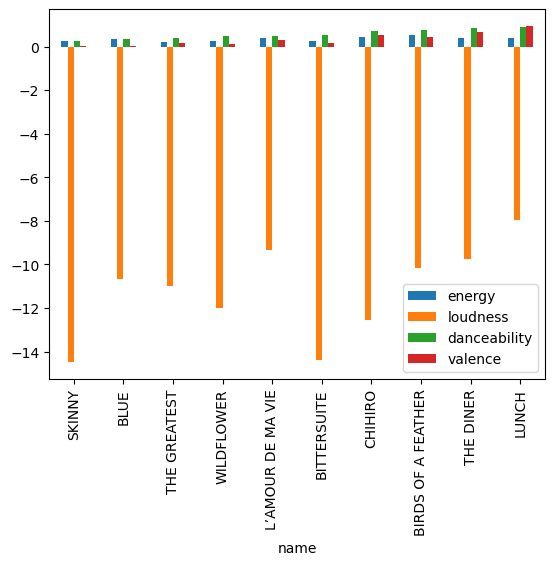

In [32]:
be_sort = be_narrowed_down.sort_values(by='danceability', ascending=True)
be_sort = be_sort.set_index('name').plot(kind = 'bar')
#be_sort.head()
#plt.show()

___^This was my first attempt at making the bar chart. I did not realize how "loudness" would look in the negatives until this graph just showed me. I also kept danceability ascending so it makes it somewhat more understandable and organized.___

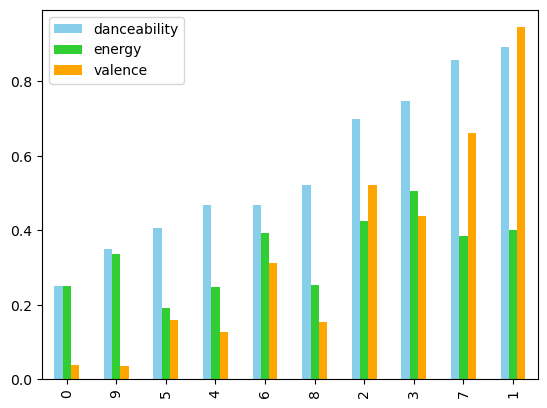

In [33]:
#fig1, ax1 =  plt.subplots(1)
#ax1.bar('Song','Danceability')

be_sort = be_narrowed_down.sort_values(by='danceability', ascending=True)
#be_sort = be_sort.set_index('danceability', 'energy', 'valence')).plot(kind='bar', color=['skyblue', 'limegreen','orange'])
#ax1(be_sort['danceability'].plot(kind='bar', color = 'skyblue'))

ax1 = be_sort[['danceability', 'energy', 'valence']].plot(kind='bar', color = ['skyblue', 'limegreen', 'orange'])



#plt.show()


___^I still was not sure how to incorporate loudness into a graph because I would run into the same problem of it making the y-axis very long in the negatives and making the positives look very small and hard to read (since the other levels are only increasing by decimal places while the loudness is decreasing in the negatives by whole numbers). I commented out the couple different ways I tried to set this bar chart up. It took me a bit to get the order and structure correct.___

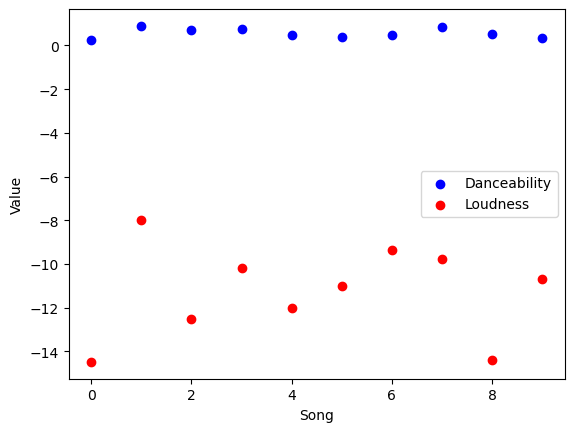

In [34]:
plt.scatter(be_sort.index,be_sort['danceability'], color='blue', label='Danceability')
plt.scatter(be_sort.index, be_sort['loudness'], color='red', label='Loudness')

plt.xlabel('Song', fontsize=10)
plt.ylabel('Value', fontsize=10)

plt.legend()

plt.show()

___^I tried to see how a scatter plot would showcase the loudness levels and I only included the danceability in this graph because that is the only element I am really comparing the loudness to so I did not see the need to include the other columns. But I did not like how this turned out because it is pretty hard to see how much the danceability level is actually increasing by in terms of its own measurement.___

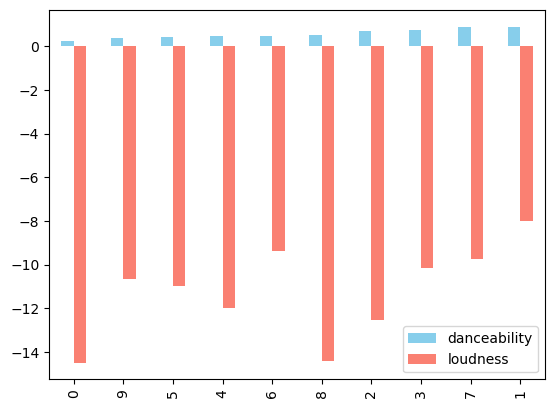

In [35]:
be_sort = be_narrowed_down.sort_values(by='danceability', ascending=True)
ax1 = be_sort[['danceability', 'loudness']].plot(kind='bar', color = ['skyblue', 'salmon'])

plt.show()

___I saw how it would look in a bar graph and I believe this is my best option in showcasing the loudness compared to danceability. I think because I didn't include the other elements, it is somewhat easier to see the difference in danceability levels. Although this obviously is not the most ideal display of data, I think it is the best I would get given my skillset and knowledge on matplotlib.___

___However, this did give me another idea on how to display my final visual dataset. I was originally going to have these two graphs side by side: one graph showcasing danceability, energy, and valence; and the second graph displaying danceability and loudness. But this gave me the idea to just separate each element into it's own graph and comparing them individually to danceability. I think this helps focus the comparability to danceability and keeps the data organized and consistent.___

## _Final Visual Graph_

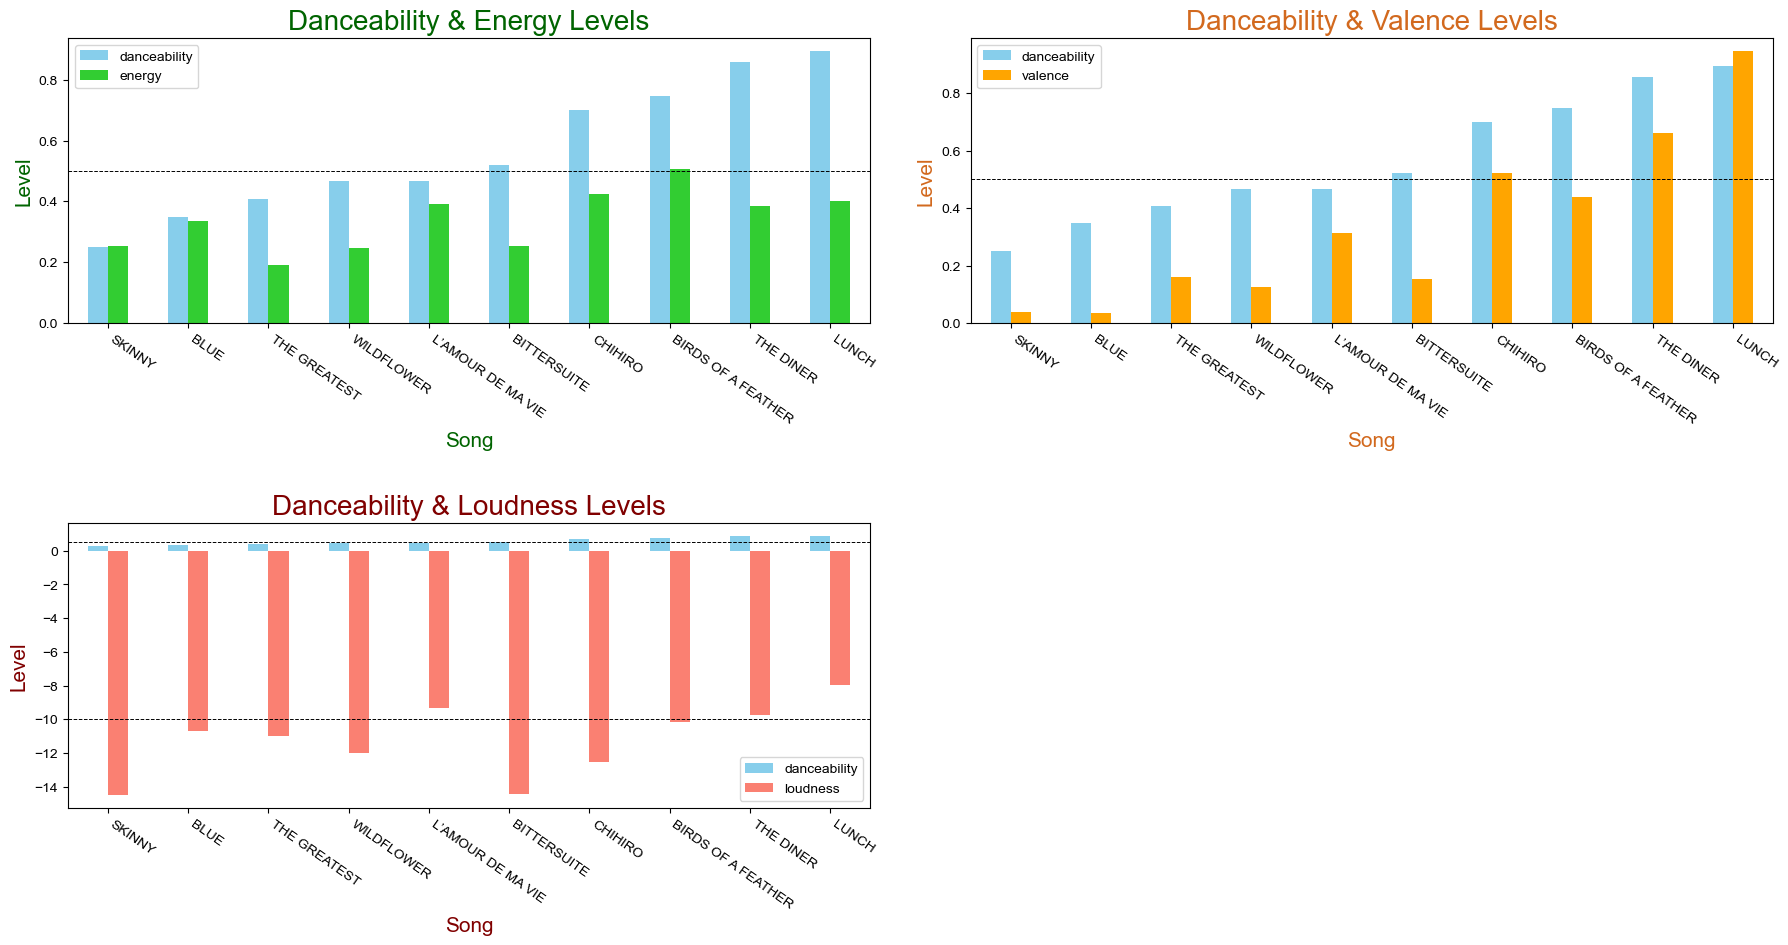

In [36]:
fig3, ax3 = plt.subplots(2, 2, figsize=(22, 10))
plt.subplots_adjust(hspace=.7, wspace=0.125)
ax3[1, 1].axis('off')

be_sort = be_narrowed_down.sort_values(by='danceability', ascending=True)
be_sort = be_sort.set_index('name')


be_sort[['danceability', 'energy']].plot(kind='bar', ax=ax3[0, 0], color=['skyblue', 'limegreen'])
be_sort[['danceability', 'valence']].plot(kind='bar', ax=ax3[0, 1], color=['skyblue', 'orange'])
be_sort[['danceability', 'loudness']].plot(kind='bar', ax=ax3[1,0], color=['skyblue','salmon'])

ax3[0, 0].set_title('Danceability & Energy Levels', fontsize=20, color = 'darkgreen')
ax3[0, 1].set_title('Danceability & Valence Levels', fontsize=20, color = 'chocolate')
ax3[1, 0].set_title('Danceability & Loudness Levels', fontsize=20, color = 'maroon')

ax3[0, 0].set_xlabel('Song', fontsize=15, color='darkgreen')
ax3[0, 1].set_xlabel('Song', fontsize=15, color = 'chocolate')
ax3[1, 0].set_xlabel('Song', fontsize=15, color = 'maroon')

ax3[0, 0].set_ylabel('Level', fontsize=15, color = 'darkgreen')
ax3[0, 1].set_ylabel('Level', fontsize=15, color = 'chocolate')
ax3[1, 0].set_ylabel('Level', fontsize=15, color = 'maroon')

ax3[0,0].set_xticklabels(ax3[1,0].get_xticklabels(), rotation=-35, ha='left')
ax3[0,1].set_xticklabels(ax3[0,0].get_xticklabels(), rotation=-35, ha='left')
ax3[1,0].set_xticklabels(ax3[0,1].get_xticklabels(), rotation=-35, ha='left')

ax3[0, 0].axhline(y=0.5, color='black', linestyle='--', linewidth=.7)
ax3[0, 1].axhline(y=0.5, color='black', linestyle='--', linewidth=.7)
ax3[1, 0].axhline(y=0.5, color='black', linestyle='--', linewidth=.7)
ax3[1, 0].axhline(y=-10, color='black', linestyle='--', linewidth=.7)

plt.style.use('seaborn-v0_8-dark')
rcParams['font.family'] = 'monospace'


plt.show()

___Although it is a little tight, I think this displays all my data well. I was thinking of just stacking them on top of each other but I liked that all three graphs are visible on one page without having to scroll. I also included a dotted line at .5 (and -10 on the loudness chart) to make my "requirement" point more clear. I added a font and style but sometimes it doesn't always load in and when it does load in, it sometimes applies the style to all my previous graphs.___

### _Analysis Conclusion_

The hope was to prove that if a song is loud and energetic, then the more danceable is it. And to prove that the more danceable a song is, then the higher the liklihood of it being a "happy" song or one that has a musically positive mood. 

I stated in my hypothesis that if danceability is higher than .5, the loudness, energy, and valence levels will also be above .5 and after looking at my final three figures, I have concluded that from this dataset, I cannot prove that my hypothesis is correct. There is not enough correlation between the variables to say whether energy or loudness levels effect the liklihood of danceability.

I may have made my hypothesis too strict because my criteria was that _both_ energy _and_ loudness had to meet a certain criteria for me to define if the danceability was high or low. And I have found that all the songs but one ('Birds of a Feather') just barely meets even one of those critera, let alone both. 

And maybe a .5 energy level was too high of a value to choose because while 'Birds of a Feather' met both criteria, it is also the only song that met the _energy_ criteria anyway. I should have taken into account what actually qualifies as 'high' energy levels. 

Additionally, the loudness levels don't seem to have much correlation with the danceability of a song either. While the graph shows the danceability consistently increasing with each song, the loudness levels are not particulary increasing _with_ it. And actually, the two most danceable songs don't even make it past my -10db requirement and also are two of three most quietest songs on the album. Meanwhile, the least danceable song, 'Skinny', has the highest decible level.

I did have one correct thing about my hypothesis though! The correlation between danceablity and valence seems to be somewhat accurate. Other than a few outliars, the valence seems, in a broad sense, to increase along with the danceability. And every song that is above a .5 danceability level also is above a .5 valence level other than, funnily enough, 'Birds of a Feather'.


So overall, my hypothesis was not very accurate when putting it to the test. I think I should have lowered the energy level requirement and also gotten data from various artists, songs, and genres to get a more accurate and distinct conclusion. 


#### _What I learned_

Not all data is very easy to visually showcase because values aren't always compatible with each other. Perhaps if I had a higher understanding of all that matplotlib can do or if I used other resources to help me map out a more functional chart, I would have been more successful in showcasing the correlations.

I feel that I referenced ChatGPT on this assignment a lot more than past assignments. And not because I had a lot of errors or because I was doing it wrong, but more so because I didnt actally know _how_ to do the thing I wanted to do. 

I didn't know how to make a dotted line on a graph that already had data on it, I didn't know how to delete a graph when I had no data to put in it, I didn't know how to stop my graphs from overlapping text. ChaGPT was a great way to find that out and I learned a lot from it because it explained the _why_ of it as well. 

This assignment taught me so much more about gathering and organizing data than I previously knew.